<a href="https://colab.research.google.com/github/SamuelAllain/ENSAE-NLP-2020/blob/master/Copie_de_Projet_haikus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Is it an haiku ?


## Data collection

## Descriptive analysis

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cle.pub to cle.pub


In [3]:
! rm -rf /root/.ssh/*
! rm -rf /root/.ssh/*
! mkdir /root/.ssh
! cp cle.pub /root/.ssh 
! chmod 700 /root/.ssh
! ssh-keyscan gitlab.com >> /root/.ssh/known_hosts
! chmod 644 /root/.ssh/known_hosts
! git config --global user.email "samuel-allain@hotmail.fr"
! git config --global user.name "samuel"


# gitlab.com:22 SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.8
# gitlab.com:22 SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.8
# gitlab.com:22 SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.8


In [5]:
! ssh git@gitlab.com
#! git clone git@gitlab.com:S.Allain/ensae-nlp-2020.git

git@gitlab.com: Permission denied (publickey).


In [0]:
import pandas as pd

In [0]:
import os
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:

#df=pd.read_csv('baseFinale27_03_2020.csv')

On affiche notre base de données.
Elle contient les colonnes :
- **haiku** : nos échantillons textuels, soit un haiku, soit une phrase aléatoire
- **nbrMots** : le nombre de mots dans l'échantillon
- **I_haiku** : l'indicatrice qui prend la valeur 1 s'il s'agit d'un haiku. En bref, nos labels pour la suite de l'étude.

In [0]:
#df = pd.read_excel('hak.xlsx')
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/baseFinale27_03_2020.csv')
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (26900, 5)


,Unnamed: 0,code,haiku,nbrMots,I_haiku
0,0,bach-d,devoir de juré le battant de l'horloge va et v...,10,1
1,1,bach-d,brise d'été quelqu'un s'exerce aux percussions...,9,1
2,2,bach-d,pas de pluie le bruit de l'herbe écrasée,8,1
3,3,bach-d,au musée si chaud que la momie transpire,8,1
4,4,bach-d,pluie d'été les gouttes descendent le lis feui...,10,1


In [0]:
len(df)

23746

On réalise une étape de tokenization pour estimer la taille du vocabulaire de notre échantillon total, et pour les sous-échantillons de nos haikus et des phrases aléatoires.

In [0]:
#liste = df.haiku.apply(lambda x: [w.text for w in tokenizer(x)])
#liste2 = reduce(add, liste)
print(liste2)

['devoir', 'de', 'juré', 'le', 'battant', 'de', "l'horloge", 'va', 'et', 'vient', 'brise', "d'été", "quelqu'un", "s'exerce", 'aux', 'percussions', 'dans', 'la', 'vallée', 'pas', 'de', 'pluie', 'le', 'bruit', 'de', "l'herbe", 'écrasée', 'au', 'musée', 'si', 'chaud', 'que', 'la', 'momie', 'transpire', 'pluie', "d'été", 'les', 'gouttes', 'descendent', 'le', 'lis', 'feuille', 'après', 'feuille', 'orage', 'de', 'grêle', 'les', 'golfeurs', 'courent', 'à', 'couvert', 'sax', 'la', 'nuit', 'rêves', 'en', 'si', 'mineur', 'entre', 'le', 'tonnerre', 'et', "l'éclair", 'zéro', 'je', 'sauve', 'une', 'souris', 'du', 'chat', 'steak', 'brûlé', 'chaise', 'du', 'dentiste', 'bruit', 'de', 'la', 'construction', 'au', 'dehors', 'jour', 'du', 'souvenir', 'un', 'vieux', 'couple', 'relit', 'la', 'lettre', 'nuit', 'du', 'samedi', "quelqu'un", 'vomit', 'sous', 'les', 'arbres', 'en', 'fleurs', 'pluie', 'du', 'soir', "j'achète", 'des', 'cerisiers', 'sur', 'internet', 'mi', 'avril', "l'herbe", 'finalement', 'ressemb

In [0]:
from functools import reduce
from operator import add
from spacy.tokenizer import Tokenizer
from spacy.lang.fr import French
nlp = French()

# Instanciating the tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Vocabulary count for the entire dataset
arra = df.haiku.apply(lambda x: [w.text for w in tokenizer(x)]).array
arrac = reduce(add, arra)
print("Vocabulary size with Spacy's tokenizer of our entire dataset: {}".format(len(set(arrac))))

# Vocabulary count for the haiku only
arrhaik=df[df["I_haiku"]==1].haiku.apply(lambda x: [w.text for w in tokenizer(x)]).array
arrhaikc = reduce(add, arrhaik)
print("Vocabulary size with Spacy's tokenizer of our haiku: {}".format(len(set(arrhaikc))))
print("Nombre de mots différents / nombre de mots : {}".format(len(set(arrhaikc))/len(arrhaikc)))

# Vocabulary count for the non haiku sentences
arrrest=df[df["I_haiku"]==0].haiku.apply(lambda x: [w.text for w in tokenizer(x)]).array
arrrestc = reduce(add, arrrest)
print("Vocabulary size with Spacy's tokenizer of our non haiku sentences: {}".format(len(set(arrrestc))))
print("Nombre de mots différents / nombre de mots : {}".format(len(set(arrrestc))/len(arrrestc)))


Vocabulary size with Spacy's tokenizer of our entire dataset: 29614
Vocabulary size with Spacy's tokenizer of our haiku: 10215
Nombre de mots différents / nombre de mots : 0.1274374040944646
Vocabulary size with Spacy's tokenizer of our non haiku sentences: 23834
Nombre de mots différents / nombre de mots : 0.13496341932999614


In [0]:
# Inspecting a tokenization sample
tokenization_sample = df.haiku.head().apply(lambda x: 
                                              [w.text for w in tokenizer(x)])
print("Tokenization sample:\n {}".format(tokenization_sample))

Tokenization sample:
 0    [devoir, de, juré, le, battant, de, l'horloge,...
1    [brise, d'été, quelqu'un, s'exerce, aux, percu...
2    [pas, de, pluie, le, bruit, de, l'herbe, écrasée]
3    [au, musée, si, chaud, que, la, momie, transpire]
4    [pluie, d'été, les, gouttes, descendent, le, l...
Name: haiku, dtype: object


In [0]:
def listToString(s):  
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 
        
mots_haikus=listToString(arrhaikc) 
mots_reste=listToString(arrrestc)

Text(0.5, 1.0, 'Mots les plus fréquents pour les phrases non haiku')

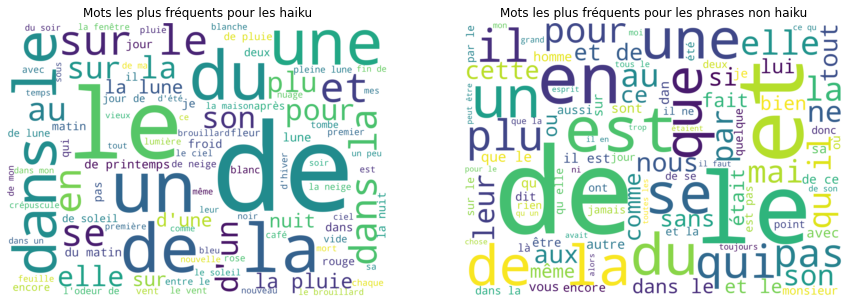

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloudh = WordCloud(background_color='white',
                          width=2500,
                          height=1800, 
                        max_words=100).generate(mots_haikus)
wordcloudr = WordCloud(background_color='white',
                          width=2500,
                          height=1800, 
                        max_words=100).generate(mots_reste)                        

# Affichage du nuage de mots
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(wordcloudh, interpolation="bilinear")
plt.axis("off")
plt.title("Mots les plus fréquents pour les haiku")
ax2 = fig.add_subplot(1,2,2)
plt.imshow(wordcloudr, interpolation="bilinear")
plt.axis("off")
plt.title("Mots les plus fréquents pour les phrases non haiku")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Mots les plus fréquents pour les phrases non haiku')

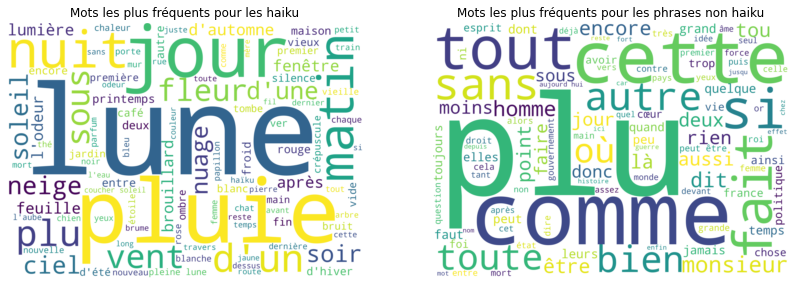

In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
mots_vides = stopwords.words('french')
mots_vides.append("les")
stopwords=set(mots_vides)

# Nuage de mots amélioré
wordcloud2h = WordCloud(   stopwords=stopwords,
                          background_color='white',
                          width=2500,
                          height=1800, 
                        max_words=100, 
                         ).generate(mots_haikus)

wordcloud2r = WordCloud(   stopwords=stopwords,
                          background_color='white',
                          width=2500,
                          height=1800, 
                        max_words=100, 
                         ).generate(mots_reste)
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(wordcloud2h, interpolation="bilinear")
plt.axis("off")
plt.title("Mots les plus fréquents pour les haiku")
ax2 = fig.add_subplot(1,2,2)
plt.imshow(wordcloud2r, interpolation="bilinear")
plt.axis("off")
plt.title("Mots les plus fréquents pour les phrases non haiku")

In [0]:
from nltk.tokenize import TreebankWordTokenizer
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

# Instanciating the tokenizer
tok = TreebankWordTokenizer()

nltk.download('stopwords')
fr_stop = set(nltk.corpus.stopwords.words('french'))
to_be_removed = list(fr_stop) 
text_data = list(df[df["I_haiku"]==1].haiku.apply(lambda x: list(filter(lambda a: a.lower() not in to_be_removed,tok.tokenize(x)))).array)

dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=4)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 49.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=389735c8157d222baa9b8506eadb3e9d76de21076bbc22b06f49ecf936154c99
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=52ff03af4727c7197a270f9af5793099f7c0dc9dfb1f598a6e042fb3baf1077e
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [0]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

cpu = cpu_count()
print('The virtual instance has {} cpus, that will be used to train the word2vec model'.format(cpu))

# We will just get the "WordVectors" parameter from the trained Word2Vec model.
# Otherwise, we could continue training with some more exemples that could be
# fed on the fly to the model.
print("Training the haiku W2V ...")
haik = Word2Vec(arrhaik, size=500, window=5, min_count=3, workers=cpu)
haik.train(arrhaik, total_examples=len(arrhaik), epochs=10)
haik_wv = haik.wv
print("Training the entire W2V ...")
ent = Word2Vec(arra, size=500, window=5, min_count=3, workers=cpu)
ent.train(arra, total_examples=len(arra), epochs=10)
ent_wv = ent.wv

The virtual instance has 4 cpus, that will be used to train the word2vec model
Training the haiku W2V ...
Training the entire W2V ...


In [0]:
domains = ['haikus', 'rest'] 
wvs = [haik_wv , rest_wv]
def closest_to(w, n=10):
  for wv, domain in zip(wvs, domains):
    if w in wv:
      closest_ws =[w[0] for w in wv.most_similar(w, topn=n)]
      print("According to {}, the closest {}, words to \"{}\" " 
      "are: \n {}".format(domain, n, w, '"'+'",\n then "'.join(closest_ws)+'"'))
    else:
      print(w, " could not be found in the {} vocabulary".format(domain))

In [0]:
closest_to('lune')
print('========================================================================')
closest_to('été')
print('========================================================================')
closest_to('faire')
print('========================================================================')
closest_to('pluie')

According to haikus, the closest 10, words to "lune" are: 
 "nuit",
 then "maison",
 then "fenêtre",
 then "claire",
 then "bourse",
 then "neige",
 then "main",
 then "dernière",
 then "pluie",
 then "abri"
According to rest, the closest 10, words to "lune" are: 
 "femelle",
 then "large",
 then "mars",
 then "national",
 then "noble",
 then "quartier",
 then "harmonieux",
 then "disparaît",
 then "décembre",
 then "commandement"
According to haikus, the closest 10, words to "été" are: 
 "haute",
 then "être",
 then "comment",
 then "hier",
 then "mauvaise",
 then "va",
 then "chiens",
 then "laissé",
 then "mais",
 then "ou"
According to rest, the closest 10, words to "été" are: 
 "eu",
 then "pris",
 then "y",
 then "b",
 then "crié",
 then "pu",
 then "agi",
 then "répété",
 then "fait",
 then "contribué"
According to haikus, the closest 10, words to "faire" are: 
 "dormir",
 then "n'a",
 then "tu",
 then "trouvé",
 then "voudrais",
 then "quand",
 then "vais",
 then "trop",
 then 

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
!pip install spacy_lefff

     |████████████████████████████████| 3.0MB 2.9MB/s 
  Created wheel for spacy-lefff: filename=spacy_lefff-0.3.6-cp36-none-any.whl size=2929361 sha256=970c97d91ad39af4de66ab0480fcc1ac7c69257c3773bae363fc863ebdf90e3b
  Stored in directory: /root/.cache/pip/wheels/c0/a9/04/33568eb2af0feda8a290f7d940cc120419a8a41752e9b85db4
Successfully built spacy-lefff


In [0]:
!python -m spacy download fr

     |████████████████████████████████| 14.7MB 4.0MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-cp36-none-any.whl size=14727027 sha256=b73446a7bc5f8321a6ad223942acccac1d9512a681bcaef2d3c206094320a210
  Stored in directory: /tmp/pip-ephem-wheel-cache-qb09k4cm/wheels/46/1b/e6/29b020e3f9420a24c3f463343afe5136aaaf955dbc9e46dfc5
Successfully built fr-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/fr_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/fr
You can now load the model via spacy.load('fr')


!!!! Assez long pour peu d'intérêt cette lemmatization

In [0]:
import spacy
from spacy_lefff import LefffLemmatizer, POSTagger
nlp = spacy.load('fr')
#pos = POSTagger()
#french_lemmatizer = LefffLemmatizer(after_melt=True, default=True)
#nlp.add_pipe(pos, name='pos', after='parser')
#nlp.add_pipe(french_lemmatizer, name='lefff', after='pos')
arra = df.haiku.apply(lambda x: [w.lemma_ for w in nlp(x)]).array
arra = reduce(add, arra)
print("Number of unique lemmas found with Spacy's lemmatizer: {}".format(len(set(arra))))

arrhaik=df[df["I_haiku"]==1].haiku.apply(lambda x: [w.lemma_ for w in nlp(x)]).array
arrhaik = reduce(add, arrhaik)
print("Vocabulary size with Spacy's lemmatizer of our haiku: {}".format(len(set(arrhaik))))

# Vocabulary count for the non haiku sentences
arrrest=df[df["I_haiku"]==0].haiku.apply(lambda x: [w.lemma_ for w in nlp(x)]).array
arrrest = reduce(add, arrrest)
print("Vocabulary size with Spacy's lemmatizer of our non haiku sentences: {}".format(len(set(arrrest))))

Number of unique lemmas found with Spacy's lemmatizer: 19220
Vocabulary size with Spacy's lemmatizer of our haiku: 7943
Vocabulary size with Spacy's lemmatizer of our non haiku sentences: 15030


## First model : Penalized Logistic regression 

In [0]:
from sklearn import svm, datasets, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
import seaborn as sn
X_train, X_test, y_train, y_test = train_test_split(
               df['haiku'], df["I_haiku"])

### Using of pretrained word embedings

In [0]:
import numpy as np

def tokens2vectors(Corpus):
  ''' transforms our X into a list of list of vec (2D array) '''
  new_sample = list()
  for sample in Corpus:
    Vecs = list()
    for token in sample.split(' '):
      try: Vecs.append(ent_wv.get_vector(token)  )
      except: Vecs.append( np.zeros(500) ) 
    new_sample.append(np.mean(Vecs, axis=0))
  return np.array(new_sample)


X_train_vec = tokens2vectors(X_train)
print(X_train_vec.shape)
# print(type(X_train_cv.toarray()), type(X_train_vec))
X_test_vec = tokens2vectors(X_test)

(17809, 500)


In [0]:
# On utilise ici la pénalité l1 - régression LASSO(résultats similaires avec pénalité l2 - régression Ridge)
lreg = LogisticRegression(penalty= "l2") 
# Entraînement modèle 
lreg.fit(X= X_train_vec, y=y_train)
# Prédiction sur le jeu test
lreg.score(X=X_test_vec, y=y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9199932625905339

Text(33.0, 0.5, 'Actual')

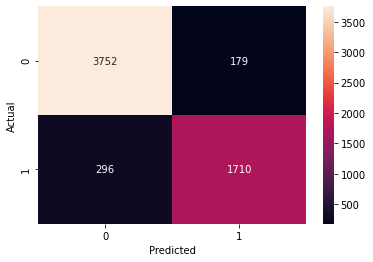

In [0]:
import matplotlib.pyplot as plt
y_pred = lreg.predict(X_test_vec)
cnf_matrix = confusion_matrix(y_test, y_pred)
matrice_a_tracer = pd.DataFrame(cnf_matrix)

plt.figure()
sn.heatmap(matrice_a_tracer, annot=True, fmt ="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Slight improvement with 2-grams

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
pipe = make_pipeline(CountVectorizer(ngram_range=(1,2)), TfidfTransformer())

pipe.fit(X_train)
feat_train = pipe.transform(X_train)

feat_test = pipe.transform(X_test)

print(feat_train.shape)

(17809, 114455)


In [0]:
idiot = DummyClassifier(strategy="stratified")
# Entraînement modèle
idiot.fit(X=feat_train, y= y_train)
# Prédiction sur le jeu test
s = idiot.score(X=feat_test, y= y_test)
print(str(s)+"\n")
s= int(round(100*s))
print("En moyenne avec le modèle idiot, on prédit correctement le sexe de l'auteur pour {}% des haïkus de la base de test.".format(s))

0.5610577732861715

En moyenne avec le modèle idiot, on prédit correctement le sexe de l'auteur pour 56% des haïkus de la base de test.


In [0]:
import numpy as np
pmodelIdiot = idiot.predict_proba(feat_test)[:, 1]
fpr1, tpr1, th1 = roc_curve(y_test, pmodelIdiot)

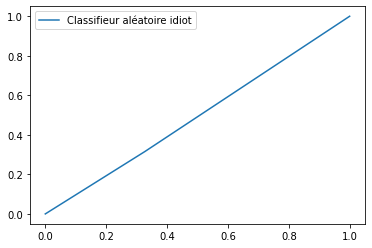

In [0]:
import matplotlib.pyplot as plt
plt.plot(fpr1, tpr1, label='Classifieur aléatoire idiot')
plt.legend()

In [0]:
# On utilise ici la pénalité l1 - régression LASSO(résultats similaires avec pénalité l2 - régression Ridge)
lreg = LogisticRegression(penalty= "l2") 
# Entraînement modèle 
lreg.fit(X= feat_train, y=y_train)
# Prédiction sur le jeu test
lreg.score(X=feat_test, y=y_test)

0.9290887653697153

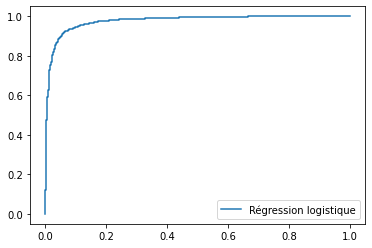

In [0]:
pmodellreg = lreg.predict_proba(feat_test)[:, 1]
fpr3, tpr3, th3 = roc_curve(y_test, pmodellreg)
plt.plot(fpr3, tpr3, label='Régression logistique')
plt.legend()

Text(33.0, 0.5, 'Actual')

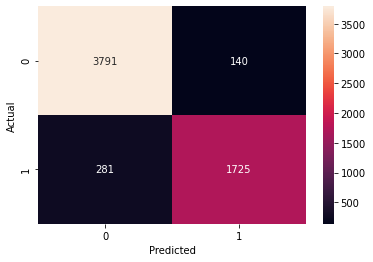

In [0]:
y_pred = lreg.predict(feat_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
matrice_a_tracer = pd.DataFrame(cnf_matrix)

plt.figure()
sn.heatmap(matrice_a_tracer, annot=True, fmt ="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [0]:
#warnings.simplefilter('ignore')
## On crée les données à partir de la base initiale
# (le découpage apprentissage/test est effectué 10 fois 
# car on utilise la validation croisée ici)
X = pipe.transform(df['haiku'])
Y = df["I_haiku"]

# Apprentissage des modèles
model=LogisticRegression(penalty = "l2")
scoring = 'f1_macro'

# Evaluation de chaque modèle à partir de validation croisée 
# Ici on effectue la 10-fold validation croisée
# Le score considéré ici est le score F1 macro comme indiqué.
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=None)
cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
cv_results


    



array([0.89280095, 0.89001434, 0.91231638, 0.9008806 , 0.9006915 ,
       0.90321724, 0.90016888, 0.89818556, 0.89588661, 0.90688549])

## Second model : Neural network


### Definition of the model

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

In [0]:
class SequenceLabeller(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, num_classes, sequence_model="LSTM"):
        super(SequenceLabeller, self).__init__()

        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        self.seq = nn.LSTM(embedding_dim, hidden_dim,batch_first=True)

        # The linear layer that maps from hidden state space to class space
        self.hidden2tag = nn.Linear(hidden_dim, num_classes)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        seq_output, (h_n,c_n) = self.seq(embeds)
        tag_space = self.hidden2tag(seq_output)
        
        tag_scores = F.log_softmax(tag_space, dim=2) # Computationally efficient for the criterion
        return tag_scores

### Preparation of the data

In [0]:
from spacy.tokenizer import Tokenizer
from spacy.lang.fr import French
nlp = French()

# Instanciating the tokenizer
tokenizer = Tokenizer(nlp.vocab)

data = []
for i in range(len(df)):
        extr = [w.text for w in tokenizer(df.haiku[i])]
        lab = df.I_haiku[i]
        data.append((extr,lab))

data[:3]


[(['devoir',
   'de',
   'juré',
   'le',
   'battant',
   'de',
   "l'horloge",
   'va',
   'et',
   'vient'],
  1),
 (['brise',
   "d'été",
   "quelqu'un",
   "s'exerce",
   'aux',
   'percussions',
   'dans',
   'la',
   'vallée'],
  1),
 (['pas', 'de', 'pluie', 'le', 'bruit', 'de', "l'herbe", 'écrasée'], 1)]